In [14]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, Adagrad
from keras.layers import Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setinin yolu
data_dir = '/content/drive/MyDrive/Flower Classification/cicekler'

# Veri setini train, test ve validation olarak ayırma oranları
train_split = 0.7
val_split = 0.15
test_split = 0.15

datagen = ImageDataGenerator(rescale=1./255, validation_split=val_split)

# Train veri seti ayrıma
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation veri seti ayırma
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Test veri seti ayırma
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2550 images belonging to 6 classes.
Found 449 images belonging to 6 classes.
Found 449 images belonging to 6 classes.


Epoch 1/10
80/80 [==============================] - 60s 581ms/step - loss: 1.6572 - accuracy: 0.3384 - val_loss: 1.3169 - val_accuracy: 0.6102
Epoch 2/10
80/80 [==============================] - 44s 553ms/step - loss: 1.3221 - accuracy: 0.6075 - val_loss: 0.9713 - val_accuracy: 0.8085
Epoch 3/10
80/80 [==============================] - 48s 593ms/step - loss: 1.0225 - accuracy: 0.7620 - val_loss: 0.7628 - val_accuracy: 0.8775
Epoch 4/10
80/80 [==============================] - 45s 566ms/step - loss: 0.7965 - accuracy: 0.8600 - val_loss: 0.6351 - val_accuracy: 0.9220
Epoch 5/10
80/80 [==============================] - 44s 548ms/step - loss: 0.6395 - accuracy: 0.8831 - val_loss: 0.5477 - val_accuracy: 0.9376
Epoch 6/10
80/80 [==============================] - 45s 565ms/step - loss: 0.5172 - accuracy: 0.9094 - val_loss: 0.4751 - val_accuracy: 0.9399
Epoch 7/10
80/80 [==============================] - 45s 560ms/step - loss: 0.4276 - accuracy: 0.9267 - val_loss: 0.4160 - val_accuracy: 0.9443

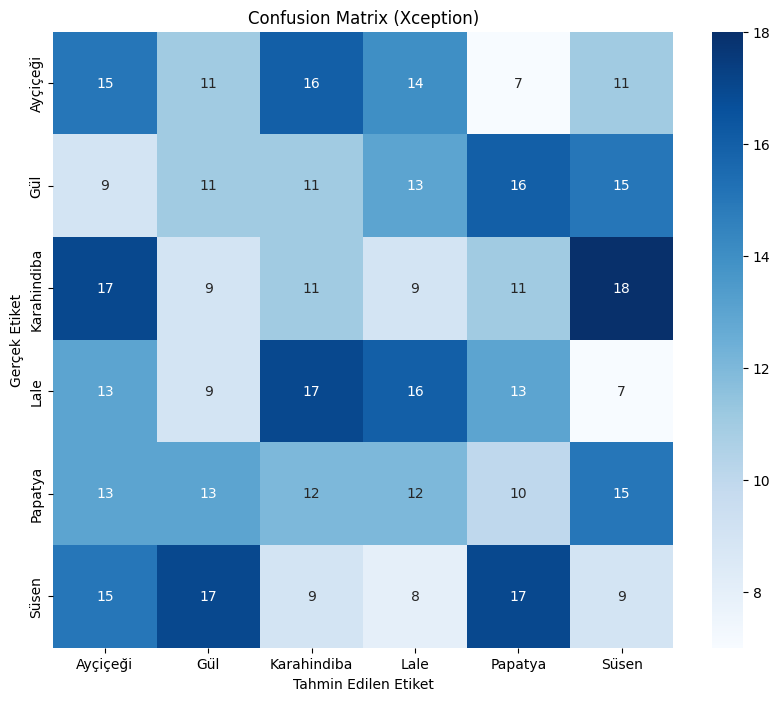

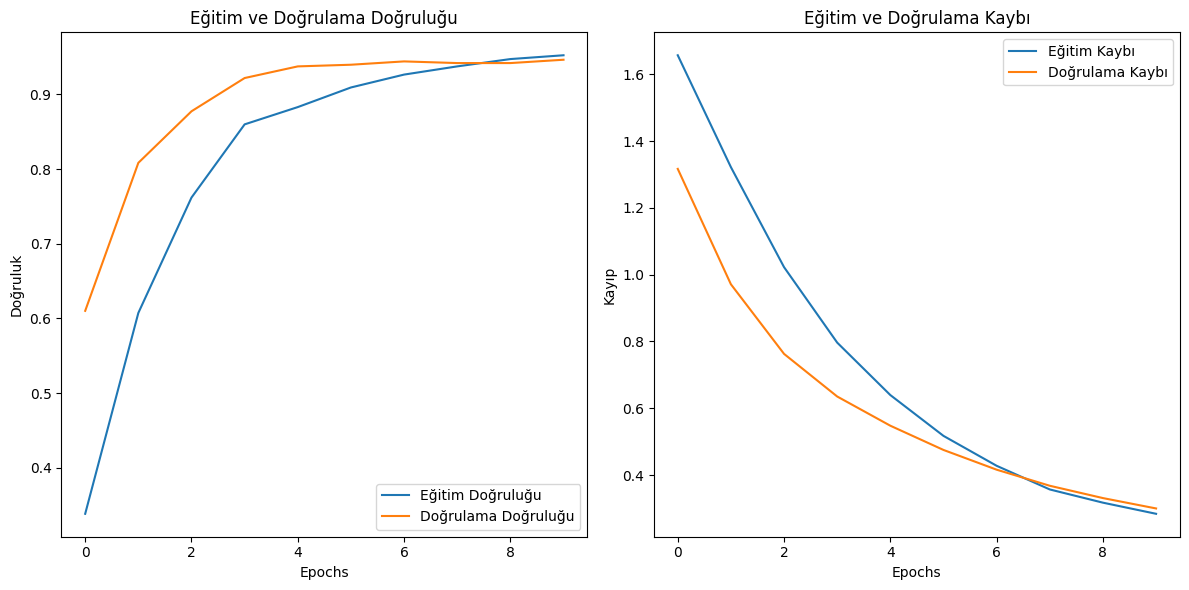

In [17]:
model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Çıkış katmanı düzenleme (problemimize uygun olması için sınıf sayısında çıkış)
x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

model = tf.keras.models.Model(model.input, output)
model.compile(optimizer=Adagrad(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy (Xception):", test_accuracy)

# Predict aşaması
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

# precision, recall ve f1 score değerlerini hesaplama ve yazdırma
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Genel Precision:", precision)
print("Genel Recall:", recall)
print("Genel F1 Score:", f1)

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix (Xception)')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')

plt.tight_layout()
plt.show()

Epoch 1/10
80/80 [==============================] - 42s 297ms/step - loss: 1.1714 - accuracy: 0.5698 - val_loss: 0.5115 - val_accuracy: 0.8463
Epoch 2/10
80/80 [==============================] - 23s 284ms/step - loss: 0.4661 - accuracy: 0.8886 - val_loss: 0.3129 - val_accuracy: 0.9109
Epoch 3/10
80/80 [==============================] - 24s 304ms/step - loss: 0.2892 - accuracy: 0.9235 - val_loss: 0.2695 - val_accuracy: 0.9332
Epoch 4/10
80/80 [==============================] - 23s 280ms/step - loss: 0.2003 - accuracy: 0.9569 - val_loss: 0.2418 - val_accuracy: 0.9354
Epoch 5/10
80/80 [==============================] - 22s 276ms/step - loss: 0.1402 - accuracy: 0.9671 - val_loss: 0.2255 - val_accuracy: 0.9376
Epoch 6/10
80/80 [==============================] - 22s 272ms/step - loss: 0.1031 - accuracy: 0.9827 - val_loss: 0.2073 - val_accuracy: 0.9443
Epoch 7/10
80/80 [==============================] - 23s 282ms/step - loss: 0.0979 - accuracy: 0.9784 - val_loss: 0.2023 - val_accuracy: 0.9376

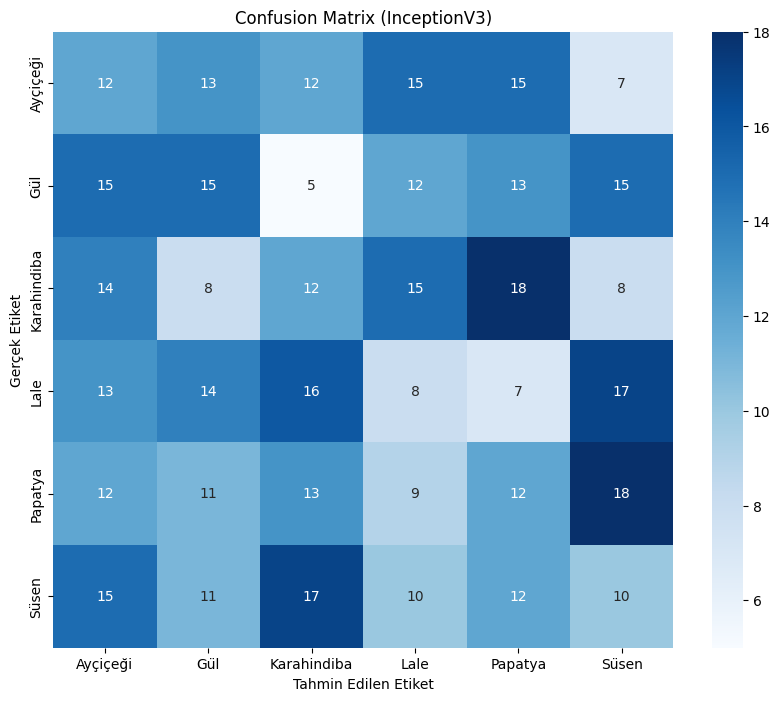

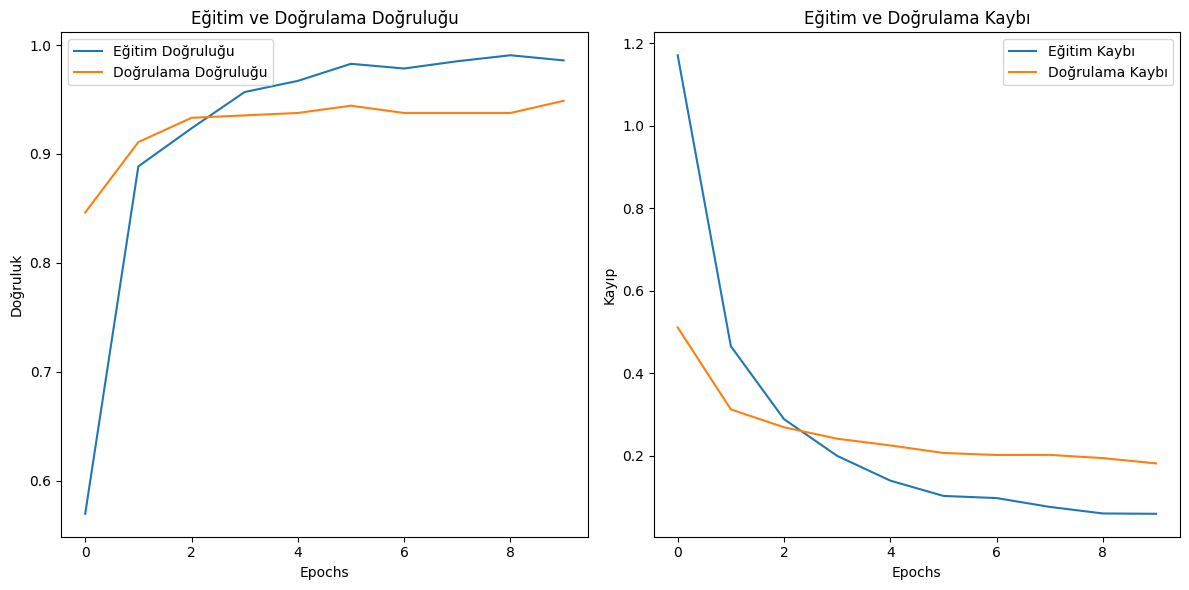

In [16]:
model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Çıkış katmanı düzenleme (problemimize uygun olması için sınıf sayısında çıkış)
x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

model = tf.keras.models.Model(model.input, output)
model.compile(optimizer=Adagrad(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy (InceptionV3):", test_accuracy)

y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Genel Precision:", precision)
print("Genel Recall:", recall)
print("Genel F1 Score:", f1)

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix (InceptionV3)')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')

plt.tight_layout()
plt.show()

Epoch 1/10
80/80 [==============================] - 46s 252ms/step - loss: 0.9873 - accuracy: 0.6549 - val_loss: 0.7381 - val_accuracy: 0.7394
Epoch 2/10
80/80 [==============================] - 17s 210ms/step - loss: 0.3230 - accuracy: 0.9059 - val_loss: 0.5166 - val_accuracy: 0.8263
Epoch 3/10
80/80 [==============================] - 17s 206ms/step - loss: 0.1969 - accuracy: 0.9424 - val_loss: 0.3990 - val_accuracy: 0.8508
Epoch 4/10
80/80 [==============================] - 16s 200ms/step - loss: 0.1381 - accuracy: 0.9580 - val_loss: 0.3263 - val_accuracy: 0.8708
Epoch 5/10
80/80 [==============================] - 16s 205ms/step - loss: 0.1120 - accuracy: 0.9698 - val_loss: 0.2885 - val_accuracy: 0.8886
Epoch 6/10
80/80 [==============================] - 16s 202ms/step - loss: 0.0910 - accuracy: 0.9741 - val_loss: 0.2400 - val_accuracy: 0.9087
Epoch 7/10
80/80 [==============================] - 19s 234ms/step - loss: 0.0717 - accuracy: 0.9800 - val_loss: 0.2224 - val_accuracy: 0.9131

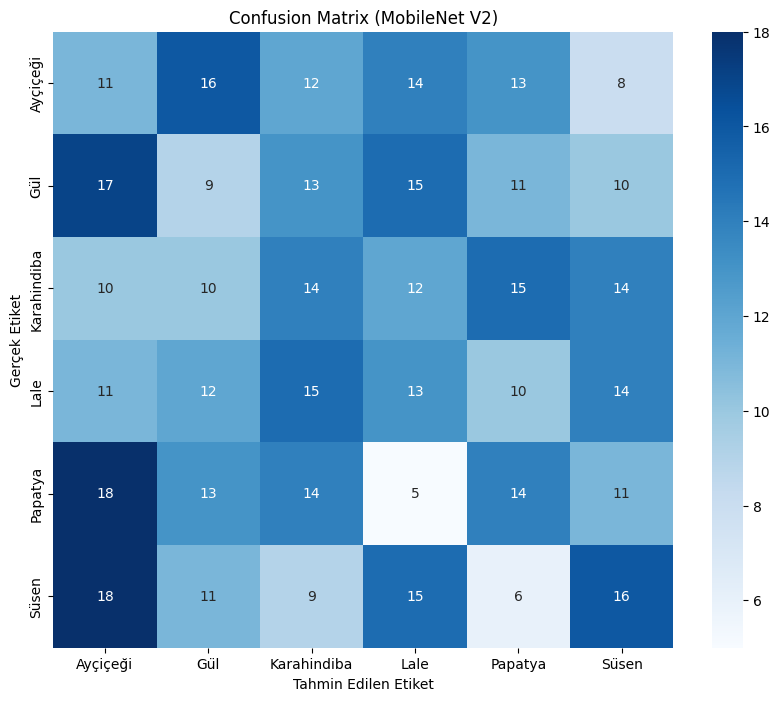

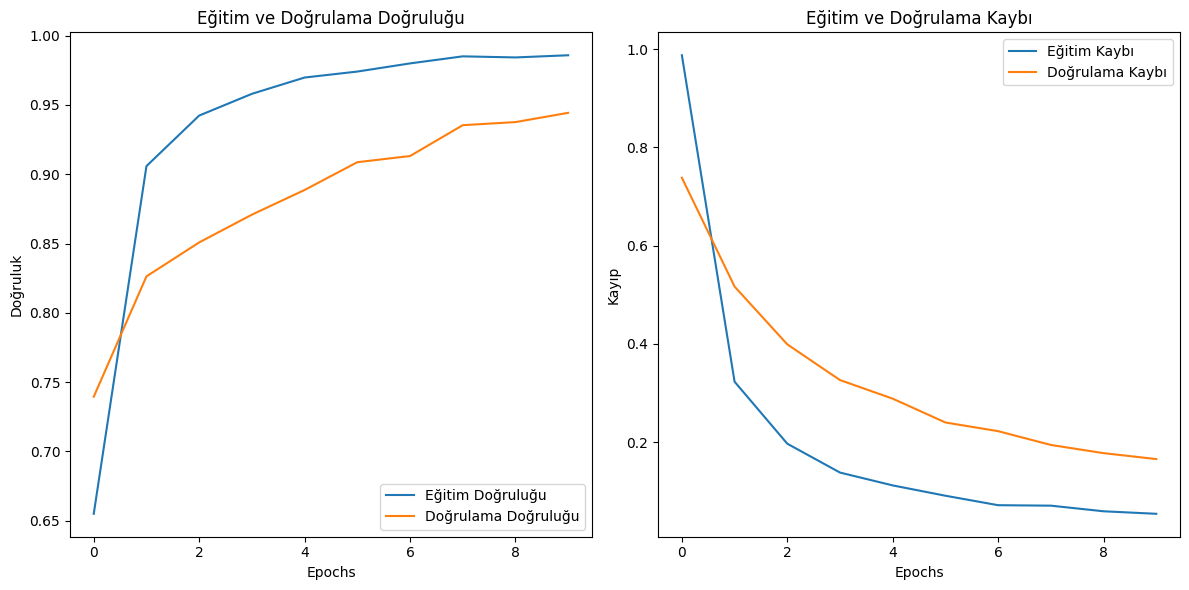

In [15]:
from keras.optimizers import Adagrad
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Çıkış katmanı düzenleme (problemimize uygun olması için sınıf sayısında çıkış)
x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

model = tf.keras.models.Model(model.input, output)
model.compile(optimizer=Adagrad(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy (MobileNet V2):", test_accuracy)

y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Genel Precision:", precision)
print("Genel Recall:", recall)
print("Genel F1 Score:", f1)

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix (MobileNet V2)')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')

plt.tight_layout()
plt.show()